# Bitcoin Trust Network



---




**Team members**
               

1.   Akash
2.   Ashwin
3.   BalaBharatRaaj
4.   Udhaykumaran
5.   Sruthi





##Goodness and Fairness algorithm

In [ ]:
import networkx as nx
import random
import math
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#function to initialize the fairness and goodness scores of each nodes
def initialize_scores(G):
    fairness = {}
    goodness = {}
    
    nodes = G.nodes()
    for node in nodes:
        fairness[node] = 1
        try:
            goodness[node] = G.in_degree(node, weight='weight')*1.0/G.in_degree(node)
        except:
            goodness[node] = 0
    return fairness, goodness

In [ ]:
#function to compute the fairness and Goodness scores
def compute_fairness_goodness(G):
    fairness, goodness = initialize_scores(G)
    
    nodes = G.nodes()
    iter = 0
    print(len(nodes))

    #Running the loop for 100 epochs
    while iter < 100:
        df = 0
        dg = 0

        #updating the goodness score and difference in goodness score
        for node in nodes:
            inedges = G.in_edges(node, data='weight')
            g = 0
            for edge in inedges:
                g += fairness[edge[0]]*edge[2]

            try:
                dg += abs(g/len(inedges) - goodness[node])
                goodness[node] = g/len(inedges)
            except:
                pass

        #updating the fairness score and difference in fairness score
        for node in nodes:
            outedges = G.out_edges(node, data='weight')
            f = 0
            for edge in outedges:
                f += 1.0 - abs(edge[2] - goodness[edge[1]])/2.0
            try:
                df += abs(f/len(outedges) - fairness[node])
                fairness[node] = f/len(outedges)
            except:
                pass
        
        print('Differences in fairness score and goodness score = %.2f, %.2f' % (df, dg))

        #if both the difference in goodness and fairness score is below a certaing threshold stop the loop

        if df < math.pow(10, -6) and dg < math.pow(10, -6):     ##threshold here is 10^-6
            break
        iter+=1
    
    return fairness, goodness

In [ ]:
G = nx.DiGraph()

In [ ]:
df = pd.read_csv('Bitcoin_OTC.csv')

In [ ]:
df.head(5)

,Source,Target,Weight,Timestamp
0,6,2,15,1289241912
1,6,5,13,1289241942
2,1,15,12,1289243140
3,4,3,18,1289245277
4,13,16,19,1289254254


In [ ]:
#Normalizing the weights between the range of -1 to 1
df["Weight"] = df["Weight"] - 11
df.head(5)

,Source,Target,Weight,Timestamp
0,6,2,4,1289241912
1,6,5,2,1289241942
2,1,15,1,1289243140
3,4,3,7,1289245277
4,13,16,8,1289254254


In [ ]:
df["Weight"] = df["Weight"]/10
df.head(5)

,Source,Target,Weight,Timestamp
0,6,2,0.4,1289241912
1,6,5,0.2,1289241942
2,1,15,0.1,1289243140
3,4,3,0.7,1289245277
4,13,16,0.8,1289254254


In [ ]:
for ind in range(len(df)):
    ## the weight should already be in the range of -1 to 1
    G.add_edge(df["Source"][ind], df["Target"][ind], weight = df["Weight"][ind]) #creation of weighted edges

fairness, goodness = compute_fairness_goodness(G)
dic = {}
#print(list(fairness))
dic['fairness'] = list(fairness)
print('-----------')
#print(list(goodness))
dic['goodness'] = list(goodness)

5881
Differences in fairness score and goodness score = 382.21, 0.00
Differences in fairness score and goodness score = 34.47, 102.29
Differences in fairness score and goodness score = 2.39, 6.97
Differences in fairness score and goodness score = 0.39, 1.06
Differences in fairness score and goodness score = 0.10, 0.24
Differences in fairness score and goodness score = 0.03, 0.06
Differences in fairness score and goodness score = 0.01, 0.02
Differences in fairness score and goodness score = 0.00, 0.00
Differences in fairness score and goodness score = 0.00, 0.00
Differences in fairness score and goodness score = 0.00, 0.00
Differences in fairness score and goodness score = 0.00, 0.00
Differences in fairness score and goodness score = 0.00, 0.00
Differences in fairness score and goodness score = 0.00, 0.00
Differences in fairness score and goodness score = 0.00, 0.00
Differences in fairness score and goodness score = 0.00, 0.00
-----------


## Implementation of Transaction

In [ ]:
def convert_to_csv():
    fair_good = pd.DataFrame(columns=['Node', 'Fairness', 'Goodness'])
    nodes = G.nodes()
    for node in nodes:
      dic = {}
      dic['Node'] = int(node)
      dic['Fairness'] = fairness[node]
      dic['Goodness'] = goodness[node]
      temp = pd.Series(dic.copy())
      fair_good = pd.concat([fair_good, pd.DataFrame([temp], columns=temp.index)], axis=0).reset_index(drop=True)
    fair_good["Node"] = fair_good["Node"].astype('int')
    fair_good.to_csv('fair_and_good.csv')

In [ ]:
from collections import defaultdict
import matplotlib.pyplot as plt
src = list(df['Source'])
dest = list(df['Target'])

In [ ]:
df.head()

,Source,Target,Weight,Timestamp
0,6,2,0.4,1289241912
1,6,5,0.2,1289241942
2,1,15,0.1,1289243140
3,4,3,0.7,1289245277
4,13,16,0.8,1289254254


In [ ]:
class Graph:
    def __init__(self) -> None:
        self.graph = defaultdict(list)
    def addEdge(self,u,v,w):
        self.graph[u].append((v,w))

In [ ]:
convert_to_csv()
data = pd.read_csv('fair_and_good.csv')

In [ ]:
data = list(df.iloc[:,2])
data

In [ ]:
g = Graph()
k=0
for i,j in zip(src,dest):
    g.addEdge(str(i), str(j), data[k])
    k+=1
k=0

In [ ]:
data = pd.read_csv('fair_and_good.csv')

In [ ]:
node = list(data['Node'])
min1 = min(node)
max1 = max(node)
t1 = max(list(df['Timestamp']))

In [ ]:
a = int(input("Enter the source node which wants to start the transaction: "))

Enter the source node which wants to start the transaction: 191


In [ ]:
flag = True
while flag:
    b = random.randint(min1,max1)   
    ind = data[data['Node']==b].index.values
    good1 = float(data.loc[ind,'Goodness'])
    if good1 > 0:
        flag = False

In [ ]:
df = pd.read_csv('Bitcoin_OTC.csv')
src = list(df['Source'])
dest = list(df['Target'])

In [ ]:
flag1 = False
for i , j in zip(src,dest):
    if not(i == a and j == b):
        flag1 = True
        break

In [ ]:
flag1

True

0.1602872805465949


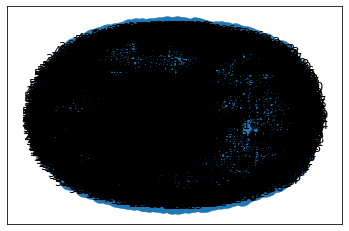

5881
Differences in fairness score and goodness score = 382.26, 0.00
Differences in fairness score and goodness score = 34.49, 102.19
Differences in fairness score and goodness score = 2.39, 6.94
Differences in fairness score and goodness score = 0.39, 1.06
Differences in fairness score and goodness score = 0.10, 0.24
Differences in fairness score and goodness score = 0.03, 0.06
Differences in fairness score and goodness score = 0.01, 0.02
Differences in fairness score and goodness score = 0.00, 0.00
Differences in fairness score and goodness score = 0.00, 0.00
Differences in fairness score and goodness score = 0.00, 0.00
Differences in fairness score and goodness score = 0.00, 0.00
Differences in fairness score and goodness score = 0.00, 0.00
Differences in fairness score and goodness score = 0.00, 0.00
Differences in fairness score and goodness score = 0.00, 0.00
Differences in fairness score and goodness score = 0.00, 0.00


In [ ]:
if flag1 :
    ind1 = data[data['Node']==a].index.values
    fair = float(data.loc[ind1,'Fairness'])
    ind2 = data[data['Node']==b].index.values
    good = float(data.loc[ind1,'Goodness'])
    weight = fair*good
    g.addEdge(a,b, weight)
    print(weight)
    G.add_edge(a, b,weight = weight)
    nx.draw_networkx(G)
    plt.show()
    fairness, goodness = compute_fairness_goodness(G)
    convert_to_csv()   
    t1+= 2
    temp = { 'Source' : a,'Target' : b, 'Weight':weight,'Timestamp':t1}
    df = df.append(temp, ignore_index = True)
    df.to_csv('Bitcoin_OTC.csv')